In [38]:
import xarray as xr
import rioxarray
import geopandas as gpd
import pandas as pd

from shapely.geometry import Polygon, Point, box

In [2]:
%cd ..

c:\Users\javie\Documents\magister\propagacion-incendios


C:\Users\javie\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
path =  r'data\EEUU\capa_viirs_6m_cuadrado\VNP02IMG_NRT.A2025102.0818.002.2025102105910.nc'

In [4]:
path_VNP03IMG_NRT =  r'data\EEUU\VNP03IMG_NRT\VNP03IMG.A2025102.0818.002.2025102163752.nc'

In [5]:
## con rioxarray
data_nasa = rioxarray.open_rasterio(path)

c:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
c:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\site-packages\rioxarray\_io.py:1143: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
c:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\site-packages\rioxarray\_io.py:1143: NotGeoreferencedWarning: Dataset has no geotransform, gc

In [6]:
data_nasa

<xarray.Dataset> Size: 414MB
Dimensions:            (band: 1, x: 6400, y: 6464)
Coordinates:
  * band               (band) int64 8B 1
  * x                  (x) float64 51kB 0.5 1.5 2.5 ... 6.398e+03 6.4e+03
  * y                  (y) float64 52kB 0.5 1.5 2.5 ... 6.462e+03 6.464e+03
    spatial_ref        int64 8B 0
Data variables:
    I04                (band, y, x) uint16 83MB ...
    I04_quality_flags  (band, y, x) uint16 83MB ...
    I04_uncert_index   (band, y, x) int8 41MB ...
    I05                (band, y, x) uint16 83MB ...
    I05_quality_flags  (band, y, x) uint16 83MB ...
    I05_uncert_index   (band, y, x) int8 41MB ...
Attributes: (12/62)
    AlgorithmType:                     SCI
    AlgorithmVersion:                  NPP_PR02 v3.0.0
    cdm_data_type:                     swath
    Conventions:                       CF-1.6
    creator_email:                     modis-ops@lists.nasa.gov
    creator_name:                      VIIRS L1 Processing Group
    ...                                ...
    StartTime:                         2025-04-12 08:18:00.000
    time_coverage_end:                 2025-04-12T08:24:00.000Z
    time_coverage_start:               2025-04-12T08:18:00.000Z
    title:                             VIIRS I-band Reflected Solar Band and ...
    VersionId:                         2
    WestBoundingCoordinate:            -115.38496

In [ ]:
coords = rioxarray.open_rasterio(path_VNP03IMG_NRT)

c:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
c:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\site-packages\rioxarray\_io.py:1143: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
c:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
c:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\site-packages\rioxarray\_io.py:1143: NotGeoreferencedWarning: Dataset has no geotransform, gc

In [8]:
data_nasa.data_vars

Data variables:
    I04                (band, y, x) uint16 83MB ...
    I04_quality_flags  (band, y, x) uint16 83MB ...
    I04_uncert_index   (band, y, x) int8 41MB ...
    I05                (band, y, x) uint16 83MB ...
    I05_quality_flags  (band, y, x) uint16 83MB ...
    I05_uncert_index   (band, y, x) int8 41MB ...

In [9]:
data_nasa.coords

Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 51kB 0.5 1.5 2.5 ... 6.398e+03 6.398e+03 6.4e+03
  * y            (y) float64 52kB 0.5 1.5 2.5 ... 6.462e+03 6.462e+03 6.464e+03
    spatial_ref  int64 8B 0

In [ ]:
data_nasa.I04 * data_nasa.I04.attrs['scale_factor'] 

<xarray.DataArray 'I04' (band: 1, y: 6464, x: 6400)> Size: 331MB
array([[[4.00048827, 4.00048827, 4.00048827, ..., 4.00048827,
         4.00048827, 4.00048827],
        [4.00048827, 4.00048827, 4.00048827, ..., 4.00048827,
         4.00048827, 4.00048827],
        [4.00048827, 4.00048827, 4.00048827, ..., 4.00048827,
         4.00048827, 4.00048827],
        ...,
        [4.00048827, 4.00048827, 4.00048827, ..., 4.00048827,
         4.00048827, 4.00048827],
        [4.00048827, 4.00048827, 4.00048827, ..., 4.00048827,
         4.00048827, 4.00048827],
        [4.00048827, 4.00048827, 4.00048827, ..., 4.00048827,
         4.00048827, 4.00048827]]], shape=(1, 6464, 6400))
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 51kB 0.5 1.5 2.5 ... 6.398e+03 6.398e+03 6.4e+03
  * y            (y) float64 52kB 0.5 1.5 2.5 ... 6.462e+03 6.462e+03 6.464e+03
    spatial_ref  int64 8B 0

In [ ]:
lat_lon = coords[0][['latitude', 'longitude']].isel(band=0).to_dataframe().reset_index()

In [ ]:
data_bandas = data_nasa.isel(band=0).to_dataframe().reset_index()

In [ ]:
data_bandas['I04_scale'] = data_bandas['I04'] * data_nasa.I04.attrs['scale_factor'] 

In [ ]:
data_lat_lon = lat_lon.merge(data_bandas, on = ['y', 'x', 'band', 'spatial_ref'], how = 'inner')

In [ ]:
data_lat_lon = data_lat_lon.drop(columns = ['band', 'spatial_ref', 'I04_uncert_index', 'I05_uncert_index'],
                                 axis= 1)

In [ ]:
gdf = gpd.GeoDataFrame(data_lat_lon, geometry=gpd.points_from_xy(data_lat_lon.longitude,
                                                                 data_lat_lon.latitude), crs="EPSG:4326")


In [ ]:
# gdf.to_file("data/EEUU/data_geopandas/viirs_A2025102_0818_002_20251021")

C:\Users\javie\AppData\Local\Temp\ipykernel_18180\1344186596.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("data/EEUU/data_geopandas/viirs_A2025102_0818_002_20251021")


In [66]:
gdf

y       x   latitude   longitude    I04  I04_quality_flags  \
0            0.5     0.5  31.062057 -115.374283  65535                256   
1            0.5     1.5  31.061914 -115.368713  65535                256   
2            0.5     2.5  31.061764 -115.363060  65535                256   
3            0.5     3.5  31.061579 -115.355690  65535                256   
4            0.5     4.5  31.061378 -115.347733  65535                256   
...          ...     ...        ...         ...    ...                ...   
41369595  6463.5  6395.5  45.531513  -73.036484  65535                256   
41369596  6463.5  6396.5  45.528015  -73.027077  65535                256   
41369597  6463.5  6397.5  45.524490  -73.017593  65535                256   
41369598  6463.5  6398.5  45.520969  -73.008133  65535                256   
41369599  6463.5  6399.5  45.517441  -72.998634  65535                256   

            I05  I05_quality_flags  I04_scale                     geometry  
0         65535                256   4.000488  POINT (-115.37428 31.06206)  
1         65535                256   4.000488  POINT (-115.36871 31.06191)  
2         65535                256   4.000488  POINT (-115.36306 31.06176)  
3         65535                256   4.000488  POINT (-115.35569 31.06158)  
4         65535                256   4.000488  POINT (-115.34773 31.06138)  
...         ...                ...        ...                          ...  
41369595  65535                256   4.000488   POINT (-73.03648 45.53151)  
41369596  65535                256   4.000488   POINT (-73.02708 45.52802)  
41369597  65535                256   4.000488   POINT (-73.01759 45.52449)  
41369598  65535                256   4.000488   POINT (-73.00813 45.52097)  
41369599  65535                256   4.000488   POINT (-72.99863 45.51744)  

[41369600 rows x 10 columns]

In [16]:
areas = {
    "carolina_norte": box(-82.25418, 35.72955, -82.00592, 35.90865),
    "picker_flats": box(-94.81305, 35.91905, -94.74988, 35.96423),
    "area2": box(-94.90265, 36.26983, -94.85749, 36.30902),
    "haoe_lead": box(-83.97421, 35.34632, -83.91338, 35.39466),
    "bee_rock_creek": box(-82.17802, 35.77566, -82.06976, 35.85195)
}

In [ ]:
gdfs_por_area = {}
for nombre, area in areas.items():
    gdf_filtrada = gdf[gdf.geometry.within(area)]
    gdfs_por_area[nombre] = gdf_filtrada

# --- Ejemplo: mostrar la cantidad de puntos por área ---
for nombre, subgdf in gdfs_por_area.items():
    print(f"{nombre}: {len(subgdf)} puntos")

carolina_norte: 1766 puntos
picker_flats: 179 puntos
area2: 107 puntos
haoe_lead: 129 puntos
bee_rock_creek: 334 puntos


In [68]:
gdfs_por_area['carolina_norte']

y       x   latitude  longitude    I04  I04_quality_flags  \
18418922  2877.5  6122.5  35.730190 -82.247551  65535                256   
18425322  2878.5  6122.5  35.736523 -82.245201  65535                256   
18425323  2878.5  6123.5  35.733940 -82.236382  65535                256   
18425324  2878.5  6124.5  35.732407 -82.231178  65535                256   
18425325  2878.5  6125.5  35.730946 -82.226212  65535                256   
...          ...     ...        ...        ...    ...                ...   
18950139  2960.5  6139.5  35.904961 -82.011292   1364                  0   
19052536  2976.5  6136.5  35.907375 -82.024727  65535                256   
19052537  2976.5  6137.5  35.905537 -82.018730  65535                256   
19052538  2976.5  6138.5  35.903664 -82.012634  65535                256   
19052539  2976.5  6139.5  35.901775 -82.006500  65535                256   

            I05  I05_quality_flags  I04_scale                    geometry  
18418922  65535                256   4.000488  POINT (-82.24755 35.73019)  
18425322  65535                256   4.000488   POINT (-82.2452 35.73652)  
18425323  65535                256   4.000488  POINT (-82.23638 35.73394)  
18425324  65535                256   4.000488  POINT (-82.23118 35.73241)  
18425325  65535                256   4.000488  POINT (-82.22621 35.73095)  
...         ...                ...        ...                         ...  
18950139  14227                  0   0.083263  POINT (-82.01129 35.90496)  
19052536  65535                256   4.000488  POINT (-82.02473 35.90738)  
19052537  65535                256   4.000488  POINT (-82.01873 35.90554)  
19052538  65535                256   4.000488  POINT (-82.01263 35.90366)  
19052539  65535                256   4.000488   POINT (-82.0065 35.90178)  

[1766 rows x 10 columns]

In [30]:
import contextily as ctx

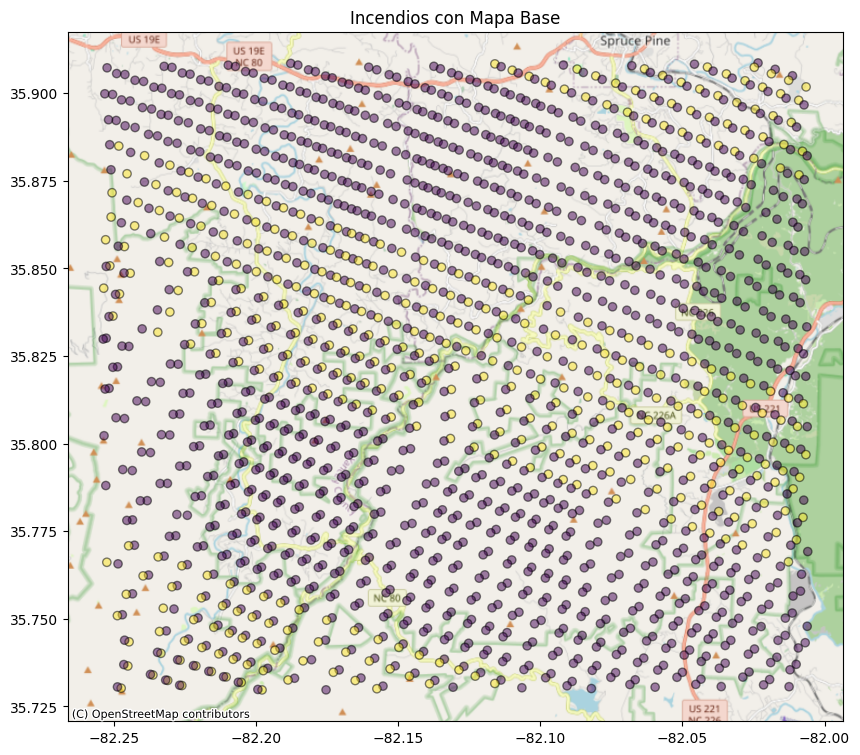

In [69]:
ax = gdfs_por_area['carolina_norte'].plot(figsize=(10, 10), alpha=0.5, edgecolor="k", column = 'I04')
ctx.add_basemap(ax, crs=gdfs_por_area['carolina_norte'].crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("Incendios con Mapa Base")
plt.show()

In [43]:
def cambiar_fecha(df):
    df['acq_datetime'] = pd.to_datetime(df['ACQ_DATE'].astype(str) + ' ' + df['ACQ_TIME'].astype(str).str.zfill(4), format='%Y-%m-%d %H%M')
    return df


In [44]:
## load FIRMS VP04

path_landsat = r'data\EEUU\190425-2221\DL_FIRE_LS_604424\fire_nrt_LS_604424.shp'
path_Modis = r'data\EEUU\190425-2221\DL_FIRE_M-C61_604423\fire_nrt_M-C61_604423.shp'
path_j1 = r'data\EEUU\190425-2221\DL_FIRE_J1V-C2_604425\fire_nrt_J1V-C2_604425.shp'   # J1 VIIRS C2
path_j2 = r'data\EEUU\190425-2221\DL_FIRE_J2V-C2_604426\fire_nrt_J2V-C2_604426.shp'   # J2 VIIRS C2
path_sv = r'data\EEUU\190425-2221\DL_FIRE_SV-C2_604427\fire_nrt_SV-C2_604427.shp'     # SUOMI VIIRS C2


SUOMI = cambiar_fecha(gpd.read_file(path_sv))
j1 = cambiar_fecha(gpd.read_file(path_j1))
j2 = cambiar_fecha(gpd.read_file(path_j2))
modis = cambiar_fecha(gpd.read_file(path_Modis))


todos =  pd.concat([SUOMI, j1, j2, modis]).reset_index(drop = True)

In [51]:
todos

LATITUDE  LONGITUDE  BRIGHTNESS  SCAN  TRACK   ACQ_DATE ACQ_TIME  \
0      46.51888  -84.37795      303.88  0.58   0.52 2025-04-11     0657   
1      46.51493  -84.39389      308.33  0.58   0.52 2025-04-11     0657   
2      39.97911  -86.83656      295.10  0.33   0.56 2025-04-11     0659   
3      35.89014  -89.78234      321.42  0.45   0.63 2025-04-11     0659   
4      39.60941  -79.91908      312.90  0.46   0.39 2025-04-11     0659   
...         ...        ...         ...   ...    ...        ...      ...   
57452  42.68881 -111.59776      310.34  3.66   1.79 2025-04-19     2220   
57453  41.53367 -123.65819      306.04  1.00   1.00 2025-04-19     2220   
57454  39.32202 -123.18787      312.47  1.01   1.00 2025-04-19     2220   
57455  45.45843 -123.07542      303.39  1.04   1.02 2025-04-19     2222   
57456  43.11201 -122.72350      302.75  1.02   1.01 2025-04-19     2222   

      SATELLITE INSTRUMENT CONFIDENCE VERSION  BRIGHT_T31    FRP DAYNIGHT  \
0             N      VIIRS          n  2.0NRT      271.44   1.92        N   
1             N      VIIRS          n  2.0NRT      270.76   2.09        N   
2             N      VIIRS          n  2.0NRT      275.41   0.96        N   
3             N      VIIRS          n  2.0NRT      280.70   1.81        N   
4             N      VIIRS          n  2.0NRT      277.22   2.02        N   
...         ...        ...        ...     ...         ...    ...      ...   
57452      Aqua      MODIS         54  6.1NRT      293.30  47.51        D   
57453      Aqua      MODIS         40  6.1NRT      295.11   4.86        D   
57454      Aqua      MODIS         60  6.1NRT      297.41   6.68        D   
57455      Aqua      MODIS         50  6.1NRT      291.03   4.75        D   
57456      Aqua      MODIS         23  6.1NRT      290.89   3.02        D   

                          geometry        acq_datetime  
0       POINT (-84.37795 46.51888) 2025-04-11 06:57:00  
1       POINT (-84.39389 46.51493) 2025-04-11 06:57:00  
2       POINT (-86.83656 39.97911) 2025-04-11 06:59:00  
3       POINT (-89.78234 35.89014) 2025-04-11 06:59:00  
4       POINT (-79.91908 39.60941) 2025-04-11 06:59:00  
...                            ...                 ...  
57452  POINT (-111.59776 42.68881) 2025-04-19 22:20:00  
57453  POINT (-123.65819 41.53367) 2025-04-19 22:20:00  
57454  POINT (-123.18787 39.32202) 2025-04-19 22:20:00  
57455  POINT (-123.07542 45.45843) 2025-04-19 22:22:00  
57456   POINT (-122.7235 43.11201) 2025-04-19 22:22:00  

[57457 rows x 16 columns]

In [48]:
subset = todos[todos.geometry.within(areas['carolina_norte'])]

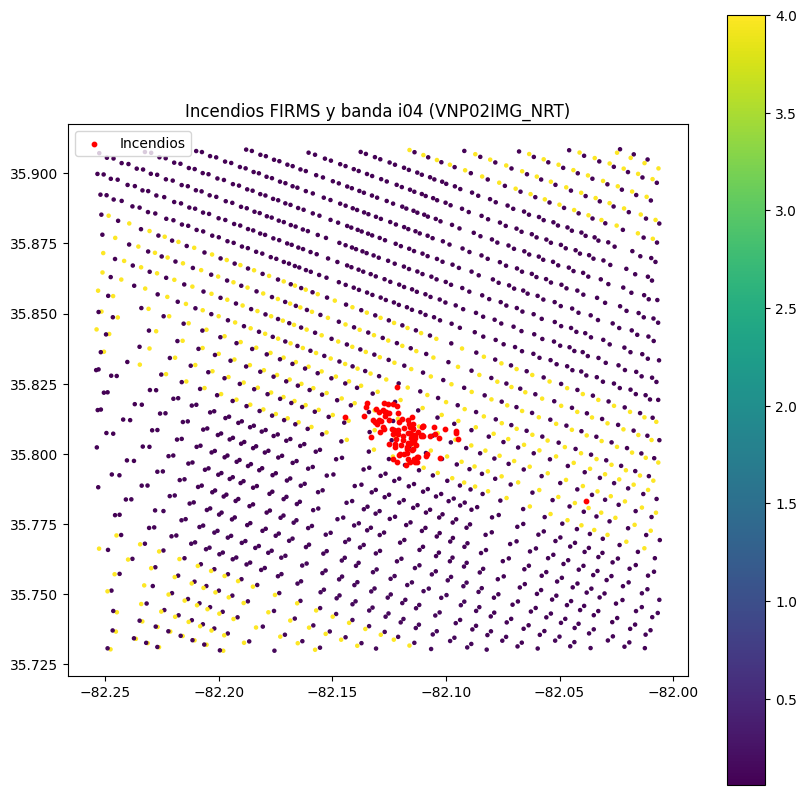

In [78]:
fig, ax = plt.subplots(figsize=(10, 10))

gdfs_por_area['carolina_norte'].plot(column="I04_scale", ax=ax, cmap="viridis", legend=True, markersize=5)
subset.plot(ax=ax, color="red", markersize=10, label="Incendios")

plt.legend()
plt.title("Incendios FIRMS y banda i04 (VNP02IMG_NRT)")
plt.show()

In [79]:
gdfs_por_area['carolina_norte']

y       x   latitude  longitude    I04  I04_quality_flags  \
18418922  2877.5  6122.5  35.730190 -82.247551  65535                256   
18425322  2878.5  6122.5  35.736523 -82.245201  65535                256   
18425323  2878.5  6123.5  35.733940 -82.236382  65535                256   
18425324  2878.5  6124.5  35.732407 -82.231178  65535                256   
18425325  2878.5  6125.5  35.730946 -82.226212  65535                256   
...          ...     ...        ...        ...    ...                ...   
18950139  2960.5  6139.5  35.904961 -82.011292   1364                  0   
19052536  2976.5  6136.5  35.907375 -82.024727  65535                256   
19052537  2976.5  6137.5  35.905537 -82.018730  65535                256   
19052538  2976.5  6138.5  35.903664 -82.012634  65535                256   
19052539  2976.5  6139.5  35.901775 -82.006500  65535                256   

            I05  I05_quality_flags  I04_scale                    geometry  
18418922  65535                256   4.000488  POINT (-82.24755 35.73019)  
18425322  65535                256   4.000488   POINT (-82.2452 35.73652)  
18425323  65535                256   4.000488  POINT (-82.23638 35.73394)  
18425324  65535                256   4.000488  POINT (-82.23118 35.73241)  
18425325  65535                256   4.000488  POINT (-82.22621 35.73095)  
...         ...                ...        ...                         ...  
18950139  14227                  0   0.083263  POINT (-82.01129 35.90496)  
19052536  65535                256   4.000488  POINT (-82.02473 35.90738)  
19052537  65535                256   4.000488  POINT (-82.01873 35.90554)  
19052538  65535                256   4.000488  POINT (-82.01263 35.90366)  
19052539  65535                256   4.000488   POINT (-82.0065 35.90178)  

[1766 rows x 10 columns]

In [82]:
subset.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [81]:
gdfs_por_area['carolina_norte'].crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [86]:

# Explorar la capa i04 con color según el valor
m = gdfs_por_area['carolina_norte'].explore(
    column="I04_scale",  
    cmap="viridis",
    legend=True,
    name="Banda i04",
    marker_kwds={"radius": 3},
)

# Añadir la capa de incendios encima
subset.explore(
    m=m,
    color= plt.cm.OrRd,
    marker_kwds={"radius": 4},
    name="Incendios FIRMS",
    column = 'acq_datetime'
)


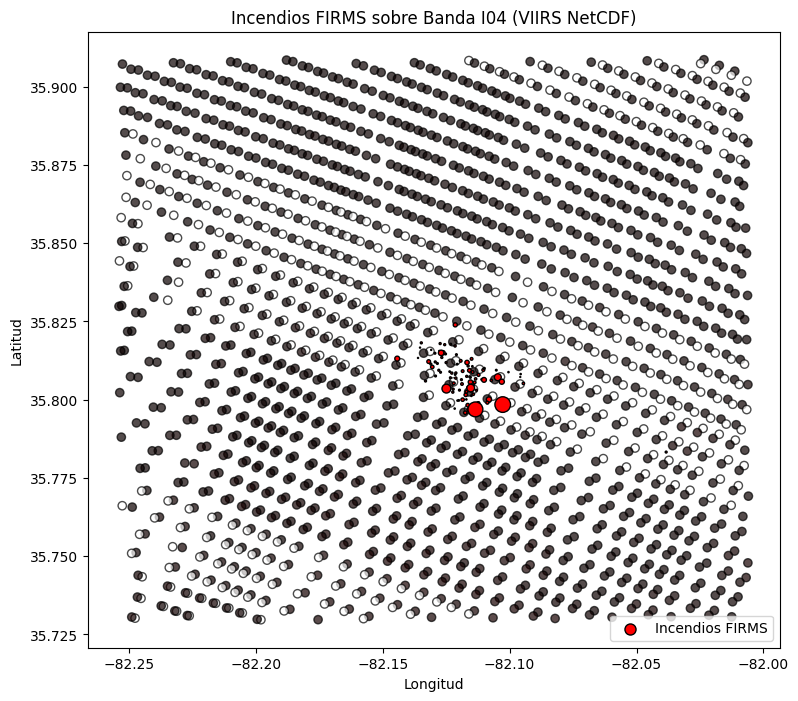

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))


gdfs_por_area['carolina_norte'].plot(ax=ax, cmap='hot', alpha=0.7,column= 'I04_scale', edgecolor="k")

# Plot puntos de FIRMS
subset.plot(
    ax=ax,
    color='red',
    markersize=subset['FRP'],  # Tamaño proporcional al FRP
    edgecolor='black',
    label='Incendios FIRMS'
)

# Añadir detalles
ax.set_title("Incendios FIRMS sobre Banda I04 (VIIRS NetCDF)")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
plt.legend()
plt.show()

In [95]:
path =  r'data\EEUU\capa_viirs_6m_cuadrado\VNP02IMG_NRT.A2025105.1842.002.2025105213757.nc'
path_VNP03IMG_NRT =  r'data\EEUU\VNP03IMG_NRT\VNP03IMG.A2025105.1842.002.2025106015043.nc'

In [ ]:
coords = rioxarray.open_rasterio(path_VNP03IMG_NRT)
data_nasa = rioxarray.open_rasterio(path)
lat_lon = coords[0][['latitude', 'longitude']].isel(band=0).to_dataframe().reset_index()
data_bandas = data_nasa.isel(band=0).to_dataframe().reset_index()
data_bandas['I04_scale'] = data_bandas['I04'] * data_nasa.I04.attrs['scale_factor']

data_lat_lon = lat_lon.merge(data_bandas, on = ['y', 'x', 'band', 'spatial_ref'], how = 'inner')
data_lat_lon = data_lat_lon.drop(columns = ['band', 'spatial_ref', 'I04_uncert_index', 'I05_uncert_index'],
                                 axis= 1)
gdf = gpd.GeoDataFrame(data_lat_lon, geometry=gpd.points_from_xy(data_lat_lon.longitude,
                                                                 data_lat_lon.latitude), crs="EPSG:4326")

c:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning:

Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.

c:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\site-packages\rioxarray\_io.py:1143: NotGeoreferencedWarning:

Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.

c:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning:

Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.

c:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\site-packages\rioxarray\_io.py:1143: NotGeoreferencedWarning:

Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.

c:\Users\javie\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning:

Dataset has no geotransform, gcps, or rpcs. The i

In [99]:
gdfs_por_area2 = {}
for nombre, area in areas.items():
    gdf_filtrada = gdf[gdf.geometry.within(area)]
    gdfs_por_area2[nombre] = gdf_filtrada


In [106]:
gdfs_por_area2['carolina_norte'].explore(
    column="I04_scale",  
    cmap= 'viridis',
    marker_kwds={"radius": 4})

In [104]:
m = gdfs_por_area2['carolina_norte'].explore(
    column="I04_scale",  
    cmap= 'viridis',
    legend=True,
    name="Banda i04",
    marker_kwds={"radius": 3},
)

# Añadir la capa de incendios encima
subset.explore(
    m=m,
    color= plt.cm.OrRd,
    marker_kwds={"radius": 4},
    name="Incendios FIRMS",
    column = 'acq_datetime'
)


In [ ]:
path =  r'data\EEUU\capa_viirs_6m_cuadrado\VNP02IMG_NRT.A2025105.1842.002.2025105213757.nc'
path_VNP03IMG_NRT =  r'data\EEUU\VNP03IMG_NRT\VNP03IMG.A2025105.1842.002.2025106015043.nc'